# Curve fitting - Polynomial regression
regression

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Least-squares regression

Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$. Note that here the index starts at 0 to be consistent with the zero-based index in Python. In lecture notes and the book, the index starts at 1. 



## Polynomial curve fitting

Another common type of nonlinear curve fitting is polynomial regression (curve fitting). Of course, linear curve (straight line) fitting is a special case of polynomial regression (with the polynomial's degree to be one). The same procedure of least-squares criterion can be used to derive the formula. 

The popularity of polynomial curve fitting is due to the fact that polynomials are easy to be:
* evaluated
* differentiated
* integrated

The goal of polynomial regression analysis is to find a polynomial function which fits the given set of data points best.  Given a set of data points $x_i,y_i$, $i\in(0,N-1)$, one can always fit a polynomial with the degree up to $N-1$, such that $y_i = f(x_i)$ for i = 0, 1, 2, …, N-1. 

The $m$-th order polynomial function can be written as 
\begin{equation}
   y = a_0 + a_1 x + a_2 x^2 + ... + a_m x^m + e
\end{equation}
where $a_i$, $i \in [0,m]$ are regression coefficients. $e$ is the error or residual. Again, the criterion used here for "best" fit is to minimize the sum of the squares of the residuals:
\begin{equation}
Error = \sum_{i=0}^{N-1} e_i^2 = \sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m \right)^2
\end{equation}

The minimization of the residual can be achieve through
\begin{equation}
\frac{dError}{da_0} = -2\sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m \right)=0
\end{equation}
\begin{equation}
\frac{dError}{da_1} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m\right) x_1 \right]=0
\end{equation}
\begin{equation}
\vdots
\end{equation}
\begin{equation}
\frac{dError}{da_m} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m\right) x_i^m \right]=0
\end{equation}

This can be written as a linear equation system for the unknown coefficient vector $\mathbf{a}=[a_0, a_1, a_2, ..., a_m]^T$:
\begin{equation}
\mathbf{A} \mathbf{a} = \mathbf{b}
\end{equation}
where 
\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
  n & \sum_{i=0}^{N-1} x_i & \sum_{i=0}^{N-1} x_i^2 &\cdots & \sum_{i=0}^{N-1} x_i^m \\
  \sum_{i=0}^{N-1} x_i & \sum_{i=0}^{N-1} x_i^2 & \sum_{i=0}^{N-1} x_i^3 &\cdots & \sum_{i=0}^{N-1} x_i^{m+1} \\
  \vdots & \vdots & \vdots & \vdots   \\
  \sum_{i=0}^{N-1} x_i^{m-1} & \sum_{i=0}^{N-1} x_i^m & \sum_{i=0}^{N-1} x_i^{m+1} &\cdots & \sum_{i=0}^{N-1} x_i^{2m} \\  
  \end{bmatrix}
\end{equation}
and 
\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
\sum_{i=0}^{N-1} y_i \\
\sum_{i=0}^{N-1} x_i y_i \\
\vdots \\
\sum_{i=0}^{N-1} x_i^m y_i
\end{bmatrix}
\end{equation}

It is noted that the matrix $\mathbf{A}$ is ill-conditioned. The problem gets worse as the degree of the polynomial increases. Fortunately, polynomials with very high degree are seldom sought in reality. 

From the programming point of view, the formula for the entries in the matrix and right hand side vector can be written as
\begin{equation}
A_{jk} = \sum_{i=0}^{N-1} x_i^{j+k}
\end{equation}
and 
\begin{equation}
b_j = \sum_{i=0}^{N-1} x_i^j y_i
\end{equation}

The polynomial regression algorithm is implemented in the "regression_lib" library:
```python
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)

    # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a
```
and an example of use is shown below. 

The following example uses the polynomial regression function to fit the given data points. Both the original data points and the fitted polynomial are plotted for comparison.

Fitted 3-th order polynomial coefficients =  [-1995.09157362   918.53315943  -112.86130699     2.75041752]


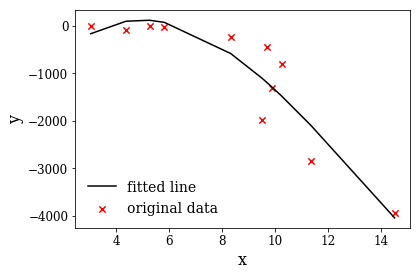

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#calcuate the coefficients for polynomial regression
#m is the degree of the polynomial.
#returns the coefficient array a for the polynomial
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)
                
    #print(A)
    #print(b)

    # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
# note: the length of x and y vectors should be the same
x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

# order of the polynomial to be fitted
m = 3

# calculate the linear regression coefficients 
a = calculate_poly_regression_coef(x, y, m) 

print("Fitted %d-th order polynomial coefficients = "%m, a)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
for i in range(m+1):
    if(i==0):
        y_pred = a[0]*np.ones(np.size(x))
    else:
        y_pred = y_pred + a[i]*x**i

# plotting the regression line 
plt.plot(x, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show() 